<a href="https://colab.research.google.com/github/anushka012399/Multiple_Regression/blob/master/Multiple_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import sys
np.set_printoptions(threshold=sys.maxsize)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

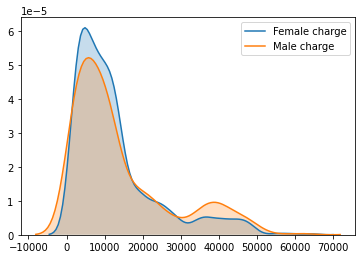

In [ ]:
sns.kdeplot(df[df['sex']=='female']['charges'], shade=True, label = 'Female charge')
sns.kdeplot(df[df['sex']=='male']['charges'], shade=True, label = 'Male charge')

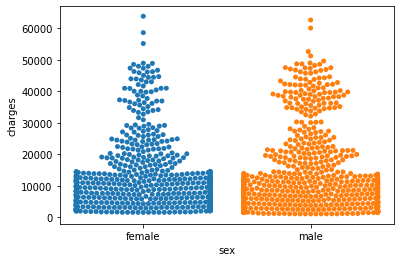

In [ ]:
sns.swarmplot(x='sex', y='charges', data=df)

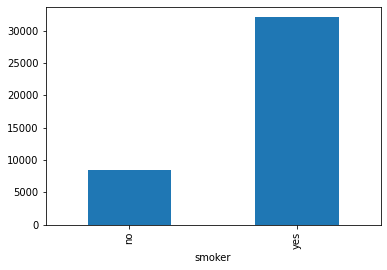

In [ ]:
df.groupby("smoker")['charges'].agg('mean').plot.bar()

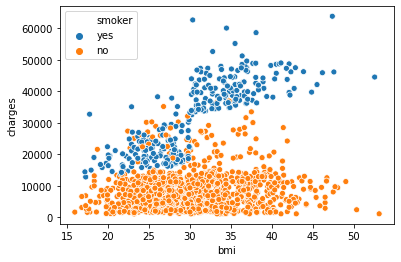

In [ ]:
sns.scatterplot(x='bmi', y='charges',hue='smoker',data=df)

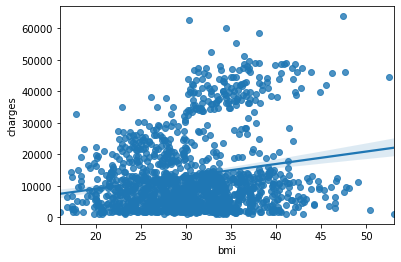

In [ ]:
sns.regplot(x='bmi',y='charges',data=df)

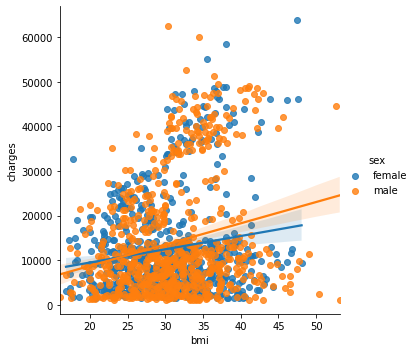

In [ ]:
sns.lmplot(x='bmi',y='charges',hue='sex',data=df)

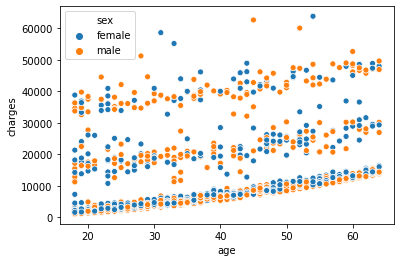

In [ ]:

sns.scatterplot(x='age', y='charges', hue='sex',data=df)

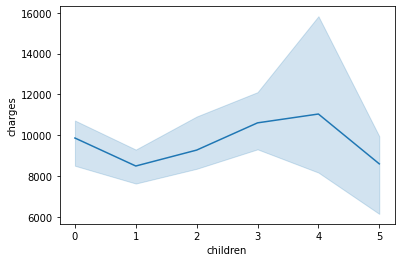

In [ ]:
sns.lineplot(x='children', y='charges',  estimator=np.median, data=df);

In [ ]:
df.groupby('children')['charges'].agg('median')

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

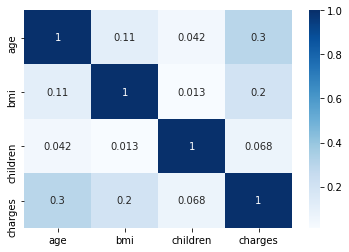

In [ ]:
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)

In [ ]:
X=df.iloc[:,:6].values
Y=df.iloc[:,6].values
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       [33, 'male', 22.705, 0, 'no', 'northwest'],
       [32, 'male', 28.88, 0, 'no', 'northwest'],
       [31, 'female', 25.74, 0, 'no', 'southeast'],
       [46, 'female', 33.44, 1, 'no', 'southeast'],
       [37, 'female', 27.74, 3, 'no', 'northwest'],
       [37, 'male', 29.83, 2, 'no', 'northeast'],
       [60, 'female', 25.84, 0, 'no', 'northwest'],
       [25, 'male', 26.22, 0, 'no', 'northeast'],
       [62, 'female', 26.29, 0, 'yes', 'southeast'],
       [23, 'male', 34.4, 0, 'no', 'southwest'],
       [56, 'female', 39.82, 0, 'no', 'southeast'],
       [27, 'male', 42.13, 0, 'yes', 'southeast'],
       [19, 'male', 24.6, 1, 'no', 'southwest'],
       [52, 'female', 30.78, 1, 'no', 'northeast'],
       [23, 'male', 23.845, 0, 'no', 'northeast'],
       [56, 'male', 40.3, 0, 'no', 'southwest'],
       [30, 'male', 35.3, 0, 'yes'

In [ ]:
Y

array([16884.924   ,  1725.5523  ,  4449.462   , 21984.47061 ,
        3866.8552  ,  3756.6216  ,  8240.5896  ,  7281.5056  ,
        6406.4107  , 28923.13692 ,  2721.3208  , 27808.7251  ,
        1826.843   , 11090.7178  , 39611.7577  ,  1837.237   ,
       10797.3362  ,  2395.17155 , 10602.385   , 36837.467   ,
       13228.84695 ,  4149.736   ,  1137.011   , 37701.8768  ,
        6203.90175 , 14001.1338  , 14451.83515 , 12268.63225 ,
        2775.19215 , 38711.      , 35585.576   ,  2198.18985 ,
        4687.797   , 13770.0979  , 51194.55914 ,  1625.43375 ,
       15612.19335 ,  2302.3     , 39774.2763  , 48173.361   ,
        3046.062   ,  4949.7587  ,  6272.4772  ,  6313.759   ,
        6079.6715  , 20630.28351 ,  3393.35635 ,  3556.9223  ,
       12629.8967  , 38709.176   ,  2211.13075 ,  3579.8287  ,
       23568.272   , 37742.5757  ,  8059.6791  , 47496.49445 ,
       13607.36875 , 34303.1672  , 23244.7902  ,  5989.52365 ,
        8606.2174  ,  4504.6624  , 30166.61817 ,  4133.

In [ ]:
len(X)

1338

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
X[:,5]=le.fit_transform(X[:,5])
X[:,1]=le.fit_transform(X[:,1])
X[:,4]=le.fit_transform(X[:,4])
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       [33, 1, 22.705, 0, 0, 1],
       [32, 1, 28.88, 0, 0, 1],
       [31, 0, 25.74, 0, 0, 2],
       [46, 0, 33.44, 1, 0, 2],
       [37, 0, 27.74, 3, 0, 1],
       [37, 1, 29.83, 2, 0, 0],
       [60, 0, 25.84, 0, 0, 1],
       [25, 1, 26.22, 0, 0, 0],
       [62, 0, 26.29, 0, 1, 2],
       [23, 1, 34.4, 0, 0, 3],
       [56, 0, 39.82, 0, 0, 2],
       [27, 1, 42.13, 0, 1, 2],
       [19, 1, 24.6, 1, 0, 3],
       [52, 0, 30.78, 1, 0, 0],
       [23, 1, 23.845, 0, 0, 0],
       [56, 1, 40.3, 0, 0, 3],
       [30, 1, 35.3, 0, 1, 3],
       [60, 0, 36.005, 0, 0, 0],
       [30, 0, 32.4, 1, 0, 3],
       [18, 1, 34.1, 0, 0, 2],
       [34, 0, 31.92, 1, 1, 0],
       [37, 1, 28.025, 2, 0, 1],
       [59, 0, 27.72, 3, 0, 2],
       [63, 0, 23.085, 0, 0, 0],
       [55, 0, 32.775, 2, 0, 1],
       [23, 1, 17.385, 1, 0, 1],
       [31, 1, 36.3, 2, 1, 3],
       [22, 1, 35.6, 0, 1, 3],
       [18,

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("region", OneHotEncoder(),[5])], remainder="passthrough") 
X = ct.fit_transform(X)    
X

array([[0.0, 0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1],
       [0.0, 0.0, 1.0, 0.0, 18, 1, 33.77, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 28, 1, 33.0, 3, 0],
       [0.0, 1.0, 0.0, 0.0, 33, 1, 22.705, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 32, 1, 28.88, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 31, 0, 25.74, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 46, 0, 33.44, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 37, 0, 27.74, 3, 0],
       [1.0, 0.0, 0.0, 0.0, 37, 1, 29.83, 2, 0],
       [0.0, 1.0, 0.0, 0.0, 60, 0, 25.84, 0, 0],
       [1.0, 0.0, 0.0, 0.0, 25, 1, 26.22, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 62, 0, 26.29, 0, 1],
       [0.0, 0.0, 0.0, 1.0, 23, 1, 34.4, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 56, 0, 39.82, 0, 0],
       [0.0, 0.0, 1.0, 0.0, 27, 1, 42.13, 0, 1],
       [0.0, 0.0, 0.0, 1.0, 19, 1, 24.6, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 52, 0, 30.78, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 23, 1, 23.845, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 56, 1, 40.3, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 30, 1, 35.3, 0, 1],
       [1.0, 0.0, 0.0, 0

In [ ]:
X.shape

(1338, 9)

In [ ]:
# avoid from dummy variable trap
X=X[:,1:]
X

array([[0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1],
       [0.0, 1.0, 0.0, 18, 1, 33.77, 1, 0],
       [0.0, 1.0, 0.0, 28, 1, 33.0, 3, 0],
       [1.0, 0.0, 0.0, 33, 1, 22.705, 0, 0],
       [1.0, 0.0, 0.0, 32, 1, 28.88, 0, 0],
       [0.0, 1.0, 0.0, 31, 0, 25.74, 0, 0],
       [0.0, 1.0, 0.0, 46, 0, 33.44, 1, 0],
       [1.0, 0.0, 0.0, 37, 0, 27.74, 3, 0],
       [0.0, 0.0, 0.0, 37, 1, 29.83, 2, 0],
       [1.0, 0.0, 0.0, 60, 0, 25.84, 0, 0],
       [0.0, 0.0, 0.0, 25, 1, 26.22, 0, 0],
       [0.0, 1.0, 0.0, 62, 0, 26.29, 0, 1],
       [0.0, 0.0, 1.0, 23, 1, 34.4, 0, 0],
       [0.0, 1.0, 0.0, 56, 0, 39.82, 0, 0],
       [0.0, 1.0, 0.0, 27, 1, 42.13, 0, 1],
       [0.0, 0.0, 1.0, 19, 1, 24.6, 1, 0],
       [0.0, 0.0, 0.0, 52, 0, 30.78, 1, 0],
       [0.0, 0.0, 0.0, 23, 1, 23.845, 0, 0],
       [0.0, 0.0, 1.0, 56, 1, 40.3, 0, 0],
       [0.0, 0.0, 1.0, 30, 1, 35.3, 0, 1],
       [0.0, 0.0, 0.0, 60, 0, 36.005, 0, 0],
       [0.0, 0.0, 1.0, 30, 0, 32.4, 1, 0],
       [0.0, 1.0, 0.0, 18, 1, 34.1, 

In [ ]:
X.shape

(1338, 8)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1070, 8)
(1070,)
(268, 8)
(268,)


In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', model.intercept_)

Intercept: 
 -11828.073537474787


In [ ]:
coeff_df = pd.DataFrame(model.coef_, ['region1','region2','region3','age', 'sex', 'bmi', 'children', 'smoker'], columns=['Coefficient'])  
coeff_df

,Coefficient
region1,-260.132732
region2,-913.278834
region3,-761.948706
age,253.700500
sex,-15.463728
bmi,335.962814
children,436.910121
smoker,23605.017267


In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [ ]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df2 = df1.head(20)
df2

,Actual,Predicted
0,9724.53000,11169.927119
1,8547.69130,9486.709085
2,45702.02235,38181.123053
3,12950.07120,16266.313289
4,9644.25250,6914.648007
5,4500.33925,3963.484876
6,2198.18985,1579.396913
7,11436.73815,14385.256569
8,7537.16390,9012.579696
9,5425.02335,7508.460677


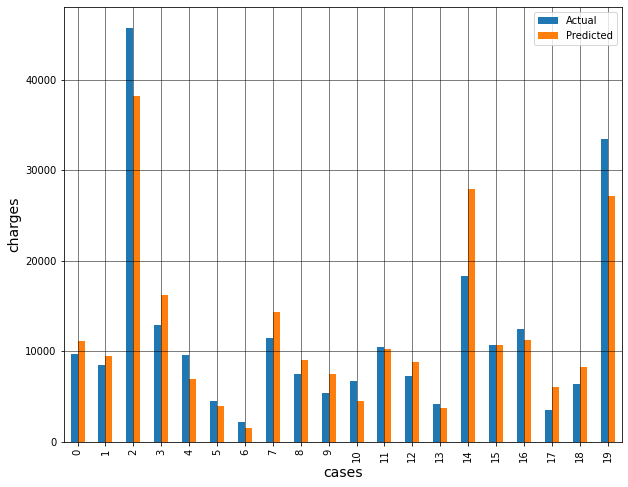

In [ ]:
import matplotlib.pyplot as plt
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
plt.xlabel('cases',color='black',fontsize=14)
plt.ylabel('charges',color='black',fontsize = 14)

plt.show()

Text(0, 0.5, 'Predicted Y')

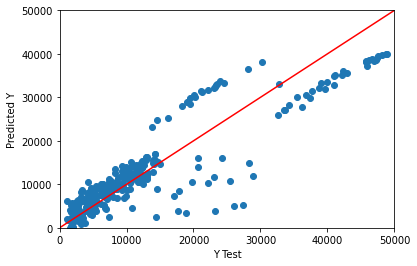

In [ ]:
plt.scatter(Y_test,Y_pred)

plt.ylim(0,50000)
plt.xlim(0,50000)

x = np.linspace(0, 500000, 30)
plt.plot(x, x + 0,'-r', linestyle='solid')

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

print('rsquare (Coefficient of determination))',r2_score(Y_test, Y_pred))

Mean Absolute Error: 3933.2726494052367
Mean Squared Error: 31827950.2295238
Root Mean Squared Error: 5641.6265588501865
rsquare (Coefficient of determination)) 0.7999876970680435


In [ ]:
X.shape

(1338, 8)

In [ ]:
X = X.astype('float64')

In [ ]:
X

array([[ 0.   ,  0.   ,  1.   , 19.   ,  0.   , 27.9  ,  0.   ,  1.   ],
       [ 0.   ,  1.   ,  0.   , 18.   ,  1.   , 33.77 ,  1.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   , 28.   ,  1.   , 33.   ,  3.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , 33.   ,  1.   , 22.705,  0.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , 32.   ,  1.   , 28.88 ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   , 31.   ,  0.   , 25.74 ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   , 46.   ,  0.   , 33.44 ,  1.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , 37.   ,  0.   , 27.74 ,  3.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , 37.   ,  1.   , 29.83 ,  2.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , 60.   ,  0.   , 25.84 ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , 25.   ,  1.   , 26.22 ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   , 62.   ,  0.   , 26.29 ,  0.   ,  1.   ],
       [ 0.   ,  0.   ,  1.   , 23.   ,  1.   , 34.4  ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   , 56.   ,  0.   , 39.

In [ ]:
import statsmodels.api as sm

In [ ]:
X2 = sm.add_constant(X)
X_opt = X2[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:04:26   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
x1          -352.9639    476.276     -0.741      0.459   -1287.298     581.370
x2         -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
x3          -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
x4           256.8564     11.899     21.587      0.000     233.514     280.199
x5          -131.3144    332.945     -0.394      0.693    -784.470     521.842
x6           339.1935     28.599     11.860      0.000     283.088     395.298
x7           475.5005    137.804      3.451      0.001     205.163     745.838
x8          2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_opt = X2[:, [0, 1, 2, 3, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:04:26   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
x1          -352.1821    476.120     -0.740      0.460   -1286.211     581.847
x2         -1034.3601    478.537     -2.162      0.031   -1973.130     -95.590
x3          -959.3747    477.778     -2.008      0.045   -1896.656     -22.094
x4           256.9736     11.891     21.610      0.000     233.646     280.301
x5           338.6646     28.559     11.858      0.000     282.639     394.690
x6           474.5665    137.740      3.445      0.001     204.355     744.778
x7          2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_opt = X2[:, [0, 2, 3, 4, 6, 7, 8]]
regressor_OLS_optimal = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS_optimal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:04:26   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
x1          -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
x2          -782.7452    413.756     -1.892      0.059   -1594.430      28.940
x3           257.0064     11.889     21.617      0.000     233.683     280.330
x4           338.6413     28.554     11.860      0.000     282.625     394.657
x5           471.5441    137.656      3.426      0.001     201.498     741.590
x6          2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_opt = X2[:, [0, 2, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     799.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:04:26   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.228e+04    948.666    -12.940      0.000   -1.41e+04   -1.04e+04
x1          -578.8620    388.384     -1.490      0.136   -1340.774     183.050
x2           257.1365     11.901     21.607      0.000     233.791     280.482
x3           333.4448     28.449     11.721      0.000     277.635     389.255
x4           468.0668    137.777      3.397      0.001     197.783     738.350
x5          2.385e+04    412.023     57.895      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      302.906   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.891
Skew:                           1.220   Prob(JB):                    1.44e-158
Kurtosis:                       5.662   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_opt = X2[:, [0, 2, 3, 4, 6, 7, 8]]

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_opt, Y, test_size = 0.2, random_state = 0)
model2 = linear_model.LinearRegression()
model2.fit(X_train2, Y_train2)
Y_pred2 = model2.predict(X_test2)
Y_pred2

array([11179.78396531,  9478.43960021, 38323.79532847, 16408.17920146,
        7036.28878939,  3837.87153244,  1436.15007609, 14507.76397291,
        9131.84254997,  7642.04803594,  4348.54524981, 10401.03254095,
        8794.02242961,  3787.08759217, 28064.52785452, 10706.01217353,
       11428.61646478,  5978.97671757,  8376.22947501, 27021.75728786,
       33785.0115461 , 14478.74114159, 11600.75786066, 32133.57489599,
        4173.98037729,  9130.70714151,   941.58336413,  9793.96593832,
        3759.9603479 , 10568.49019205,  9128.72005345, 40090.05779589,
       15702.26304759, 13891.48517285, 24620.74114819,  5025.53695782,
       12618.62128196, 30779.56304825, 33674.46414918,  3661.21699033,
        3834.74903591,  3991.63644158, 30408.63374001, 39649.25468794,
       27802.72192668,  5209.74250002, 10595.09645726,  7965.6045085 ,
        3450.23945008, 10205.62630831,  5579.2804889 ,  3541.77664294,
       33033.87405448, 38340.32817368, 16049.61764395,  7040.2672175 ,
      

In [ ]:
print(X_train2.shape)
print(Y_train2.shape)
print(X_test2.shape)
print(Y_test2.shape)

(1070, 7)
(1070,)
(268, 7)
(268,)


Text(0, 0.5, 'Predicted Y')

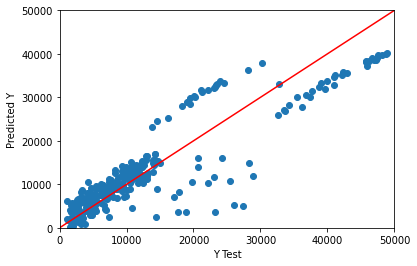

In [ ]:
plt.scatter(Y_test2,Y_pred2)

plt.ylim(0,50000)
plt.xlim(0,50000)

x = np.linspace(0, 500000, 30)
plt.plot(x, x + 0,'-r', linestyle='solid')

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test2, Y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test2, Y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test2, Y_pred2)))

print('rsquare (Coefficient of determination))',r2_score(Y_test2, Y_pred2))

Mean Absolute Error: 3944.296734627418
Mean Squared Error: 31869018.645920713
Root Mean Squared Error: 5645.265152844525
rsquare (Coefficient of determination)) 0.7997296160894672


In [ ]:
residuals= Y_test2-Y_pred2

In [ ]:

# normalized residuals
model_norm_residuals = regressor_OLS_optimal.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(residuals)
# leverage, from statsmodels internals
model_leverage = regressor_OLS_optimal.get_influence().hat_matrix_diag

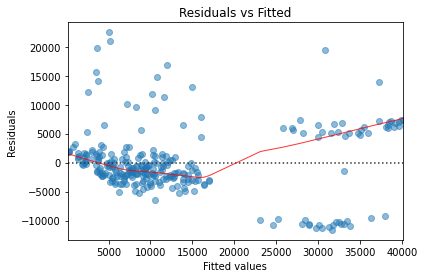

In [ ]:
plot1 = plt.figure()
plot1.axes[0] = sns.residplot(Y_pred2, residuals,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot1.axes[0].set_title('Residuals vs Fitted')
plot1.axes[0].set_xlabel('Fitted values')
plot1.axes[0].set_ylabel('Residuals');

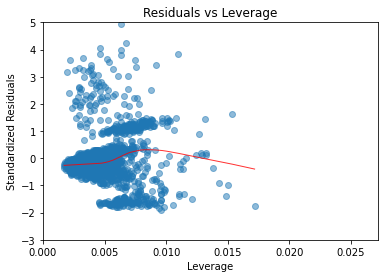

In [ ]:
plot2 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot2.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot2.axes[0].set_ylim(-3, 5)
plot2.axes[0].set_title('Residuals vs Leverage')
plot2.axes[0].set_xlabel('Leverage')
plot2.axes[0].set_ylabel('Standardized Residuals');